# Importing the required libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

### Standardize the data

In [3]:

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Main K means function made from scratch

In [4]:
# KMeans from scratch
def kmeans(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    # Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    prev_centroids = centroids.copy()

    for _ in range(max_iters):
        
        # Calculate pairwise distances between data points and centroids using broadcasting
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)

        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=1)
       # Update centroids
        centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.sum(np.abs(centroids - prev_centroids)) < tol:
            break

        prev_centroids = centroids.copy()

    return labels, centroids

In [5]:
# Apply KMeans from scratch
k = 3
labels_scratch, centroids_scratch = kmeans(X_std, k)

# Visualizing our results!

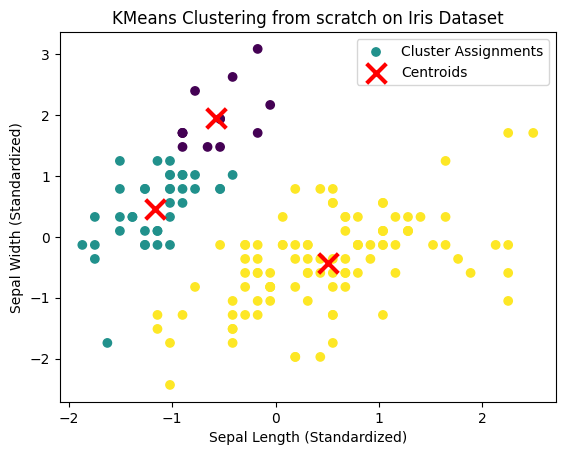

In [6]:

plt.scatter(X_std[:, 0], X_std[:, 1], c=labels_scratch, cmap='viridis', label='Cluster Assignments')
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('KMeans Clustering from scratch on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend()
plt.show()